In [137]:
import pandas as pd
import sklearn.preprocessing as skp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('heart.csv')

# Data Binning
Using MaxHR to create a new categorical column

In [139]:
df['MaxHR Level'] = skp.KBinsDiscretizer(n_bins=5, encode='ordinal').fit_transform(df['MaxHR'].values.reshape(-1, 1))

In [140]:
df['MaxHR Level'].replace(0, 'Low', inplace=True)
df['MaxHR Level'].replace(1, 'Low-Mid', inplace=True)
df['MaxHR Level'].replace(2, 'Mid', inplace=True)
df['MaxHR Level'].replace(3, 'Mid-High', inplace=True)
df['MaxHR Level'].replace(4, 'High', inplace=True)

In [141]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHR Level
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Mid-High
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Low
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Low
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Low-Mid
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,High
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0,High
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0,Mid
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,Mid
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0,Low-Mid


# Handling Outliers
Using visualization to identify outliers, then modifying dataframe accordingly

### Handling RestingBP Outliers

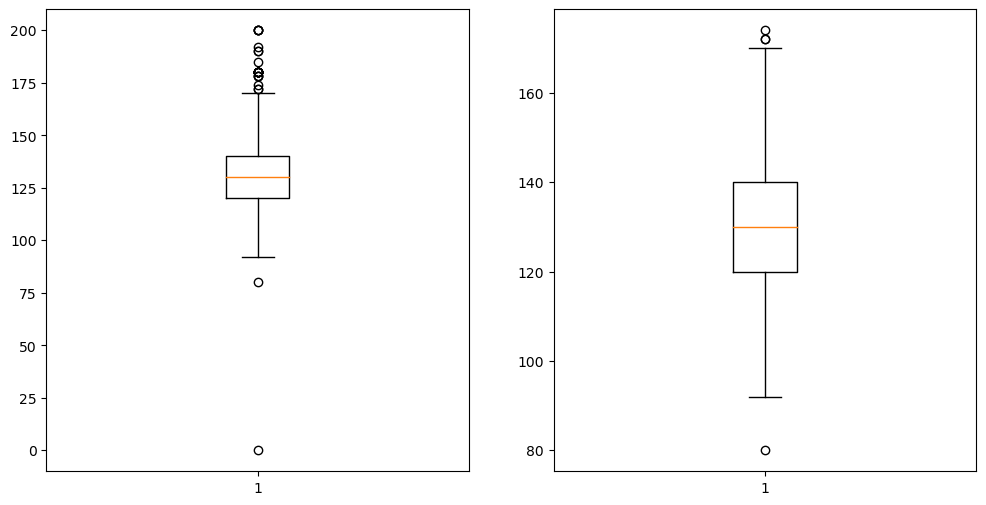

In [142]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='RestingBP')
axes[1].boxplot(df[(df.RestingBP<175)&(df.RestingBP>75)]['RestingBP']);

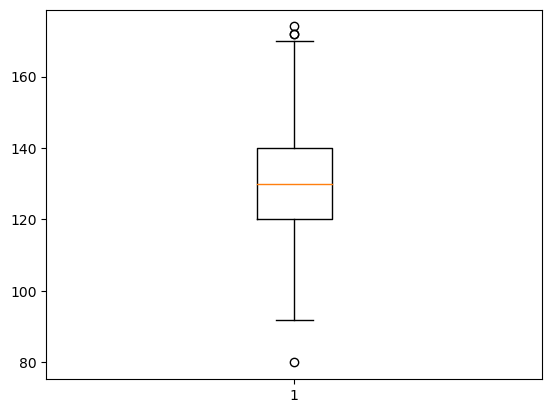

In [143]:
df.loc[(df.RestingBP>175)|(df.RestingBP<75), 'RestingBP'] = df.RestingBP.median()
plt.boxplot(df.RestingBP);

### Handling Cholesterol Outliers

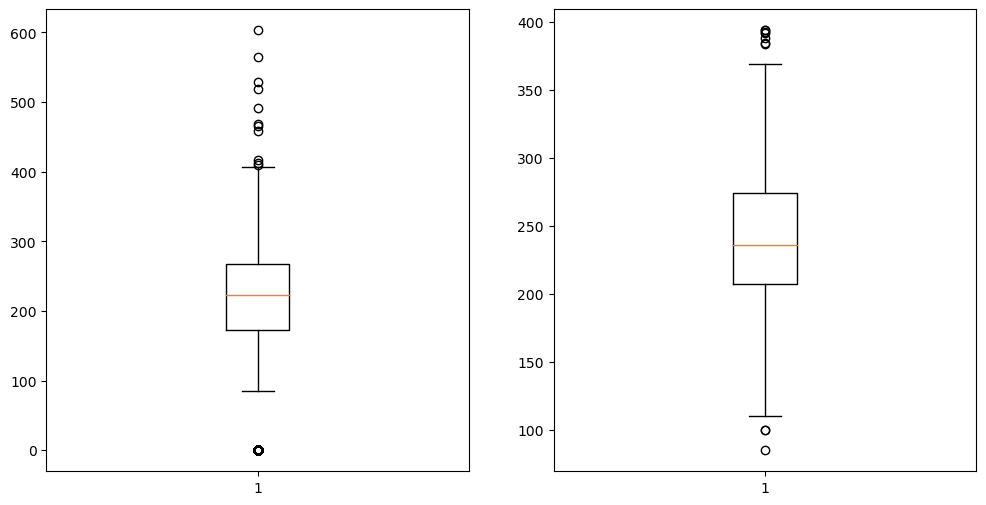

In [146]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='Cholesterol')
axes[1].boxplot(df[(df.Cholesterol<400)&(df.Cholesterol>80)]['Cholesterol']);

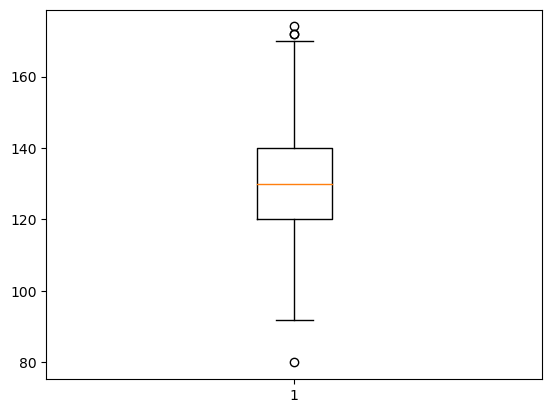

In [147]:
df.loc[(df.Cholesterol>400)|(df.Cholesterol<80), 'Cholesterol'] = df.Cholesterol.median()
plt.boxplot(df.RestingBP);

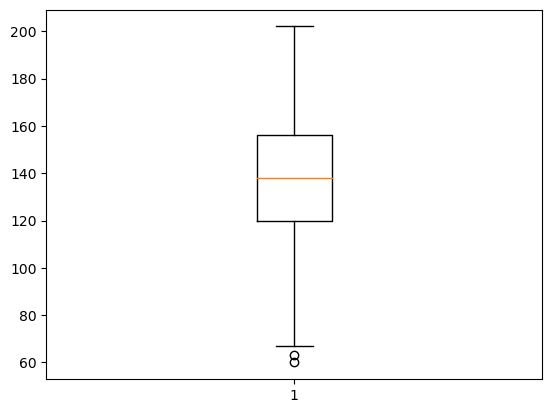

In [149]:
plt.boxplot(df.MaxHR); # Not many outliers, so no modifications done to MaxHR